In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [18]:
class Source:
    
    def __init__(self, ra, dec, jansky=100., index=-1., mfreq=150.):
        
        '''ra: right ascension (in radians) :think of long and held constant:
        dec: declination (in radians) :think of latitude and held constant:
        jansky: source flux density at specified frequency (mfreq)
        index: spectral index of flux density
        mfreq: specified frequency of jansky in MHz'''
        
        self.jansky = jansky
        self.mfreq = mfreq
        self.index = index
        self.ra = ra
        self.dec = dec
    
    def get_source_vector(self, lst, lat):
        
        '''Return topocentric vector pointing toward source given local 
        sidereal time (lst) :can change: and latitude (lat) :and held constant: in radians.'''
        
        ha = lst - self.ra
        #print(ha, "hour angle")
        x_eq = np.cos(self.dec) * np.cos(ha)
        y_eq = -np.sin(ha)
        z_eq = np.sin(self.dec)
        xyz_eq = np.array([x_eq, y_eq, z_eq])
        #print(xyz_eq, "equatorial")
        M_eq2top = np.array([[0., 1., 0],
                             [-np.sin(lat), 0, np.cos(lat)],
                             [ np.cos(lat), 0, np.sin(lat)]])
        xyz_top = np.dot(M_eq2top, xyz_eq)
        #print(xyz_top, "top")
        return xyz_top
        
    def measurement_eq(self, antenna1 ,antenna2, lst, lat):
        
        t= np.array(antenna1) - np.array(antenna2)   
        x = self.jansky*((self.mfreq*1e6)/(150.0e6))**(self.index)*np.exp(-2j*np.pi*np.dot(t,self.get_source_vector(lst,lat))*self.mfreq*1e6/(3e8))
        
        return x

In [24]:
test1 = Source(0.0,0.0)
#print(test1.get_source_vector(np.pi/2.0,0.0))
test1.measurement_eq([0,0,0],[21,0,0], np.pi/2.0,0.0)

(-100+9.8095540059105928e-14j)

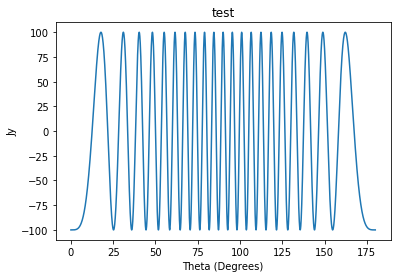

In [30]:
emp1=[]
horz=[]
emp2=[]

for i in range(2881):
    horz.append(i/16.0)
    emp1.append(test1.measurement_eq([0,0,0],[21.0,0,0],-np.pi/2.0+i/(180.0*16.0)*np.pi,0.0))

plt.figure(1)
plt.title('test')
plt.xlabel('Theta (Degrees)')
plt.ylabel('Jy')
plt.plot(horz,emp1)
#the Zeroing for the sources below the horizon will be covered by introduction of beams.